In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
print(sys.path)

['/home/hieutt/UniCon/notebooks', '/home/hieutt/miniconda3/envs/torchtf/lib/python39.zip', '/home/hieutt/miniconda3/envs/torchtf/lib/python3.9', '/home/hieutt/miniconda3/envs/torchtf/lib/python3.9/lib-dynload', '', '/home/hieutt/miniconda3/envs/torchtf/lib/python3.9/site-packages', '../']


In [3]:
import matplotlib.pyplot as plt
import torch

In [4]:
def change_state_dict(state_dict):
    """
    Because state dict in distributed GPU is different
    """
    new_state_dict = {}
    for k, v in state_dict.items():
        k = k.replace("module.", "")
        new_state_dict[k] = v
    return new_state_dict

In [5]:
save_path = '../save/ROAD_models/UniconViT/UniconViT_ROAD_resnet50_lr_0.005_decay_0.0001_bsz_128_temp_0.07_mixup_lambda_0.5_trial_road_fab_ConViT_cosine_warm/'
# /home/hieutt/UniCon/save/ROAD_models/UniconViT/UniconViT_ROAD_resnet50_lr_0.005_decay_0.0001_bsz_128_temp_0.07_mixup_lambda_0.5_trial_road_fab_ConViT_cosine_warm/runs
# /home/hieutt/UniCon/save/ROAD_models/UniCon/UniCon_ROAD_resnet50_lr_0.001_decay_0.0001_bsz_128_temp_0.1_mixup_lambda_0.5_trial_road_fab_adamw_cosine_warm/ckpt_epoch_12.pth
ckpt_epoch = 180
# model_path = f'{save_path}/last.pth'
model_path = f'{save_path}/ckpt_epoch_{ckpt_epoch}.pth'
checkpoint = torch.load(model_path, weights_only=False)

In [6]:
# Extract the lists from the checkpoint
train_loss = checkpoint['train_loss']
val_loss = checkpoint['val_loss']
train_acc = checkpoint['train_acc']
val_acc = checkpoint['val_acc']
learning_rate = checkpoint['lr']
min_length = min(len(train_loss), len(val_loss), len(train_acc), len(val_acc), len(learning_rate))

# Trim the lists to have the same length
train_loss = train_loss[:min_length]
val_loss = val_loss[:min_length]
train_acc = train_acc[:min_length]
val_acc = val_acc[:min_length]
learning_rate = learning_rate[:min_length]
epochs = range(1, min_length + 1)


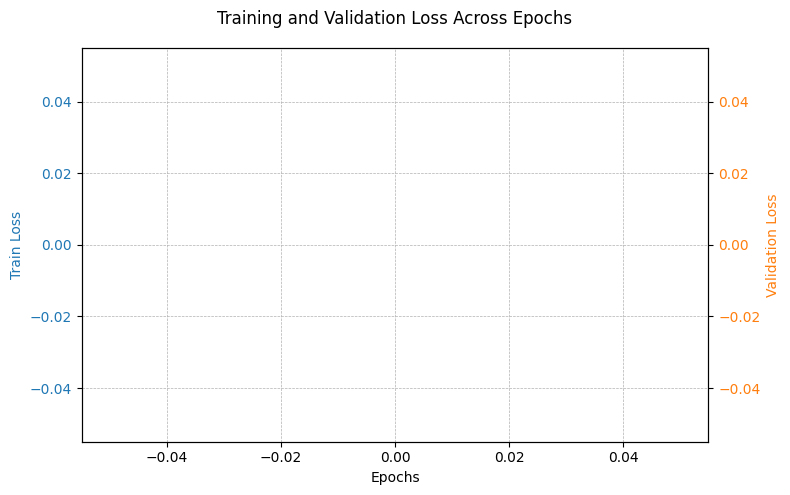

In [10]:

fig, ax1 = plt.subplots(figsize=(8, 5))

# Plotting train loss on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Train Loss', color=color)
ax1.plot(epochs, train_loss, label='Train Loss', marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create a second y-axis to plot the validation loss
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Validation Loss', color=color)
ax2.plot(epochs, val_loss, label='Validation Loss', marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding title and showing the plot
fig.suptitle('Training and Validation Loss Across Epochs')
fig.tight_layout()
plt.show()

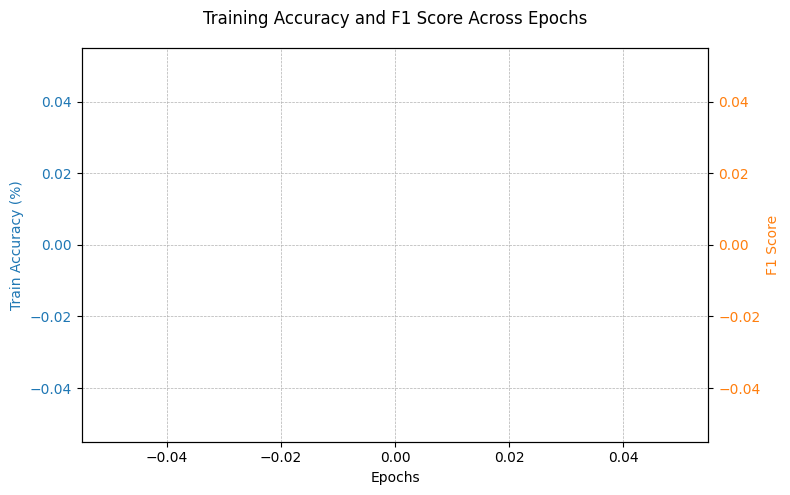

In [8]:
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plotting train accuracy on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Train Accuracy (%)', color=color)
ax1.plot(epochs, train_acc, label='Train Accuracy', marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create a second y-axis to plot the F1 score
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('F1 Score', color=color)
ax2.plot(epochs, val_acc, label='F1 Score', marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding title and showing the plot
fig.suptitle('Training Accuracy and F1 Score Across Epochs')
fig.tight_layout()
plt.show()

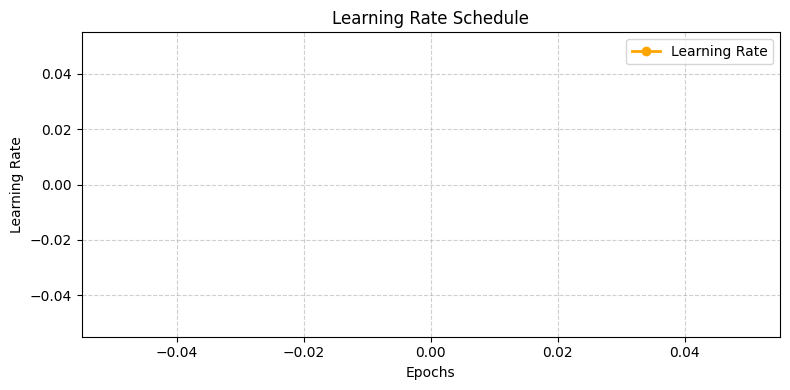

In [9]:
plt.figure(figsize=(8, 4))

# Plot the learning rate with enhancements for better visualization
plt.plot(epochs, learning_rate, label='Learning Rate', marker='o', linestyle='-', linewidth=2, color='orange')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')

# Show enhanced plot
plt.tight_layout()
plt.show()

In [2]:
%load_ext tensorboard
%tensorboard --logdir ../save/ROAD_models/UniconViT/UniconViT_ROAD_resnet50_lr_0.005_decay_0.0001_bsz_128_temp_0.07_mixup_lambda_0.5_trial_road_fab_ConViT_cosine_warm/runs/ --port 6006 --host 0.0.0.0



In [26]:
from networks.vision_trans import PatchEmbedding, MultiHeadAttention, ConViT

In [34]:

x = torch.empty((128, 3, 32, 32))
print(x.size())

torch.Size([128, 3, 32, 32])


In [36]:
patches_embedded_shape = PatchEmbedding()(x).shape
patches_embedded_shape

torch.Size([128, 65, 128])

In [35]:
patches_embedded = PatchEmbedding()(x)
MultiHeadAttention()(patches_embedded).shape


torch.Size([128, 65, 128])